To Do

% chagne between years for device_names
%search the K submissions
% more detailed DTX search - see the blogs
More detailed search for samd
crawl the submission paper for evidence details / company details
https://dtxalliance.org/understanding-dtx/product-library/
https://guidea.com/insights/the-first-500-fda-cleared-samd
https://orthogonal.io/insights/samd/help-us-build-an-authoritative-list-of-samd-cleared-by-the-fda/

In [33]:
import pandas as pd
ai_devices = pd.read_csv('/Users/mehulpatel/coding/fda_submissions/data/ai-ml-enabled-devices-csv.csv', encoding='latin1')
ai_devices.head()
ai_devices.shape

#this is all the AI/ML FDA submissions 


(1016, 6)

In [34]:
ai_devices.head(3)

,Date of Final Decision,Submission Number,Device,Company,Panel (lead),Primary Product Code
0,9/27/2024,K240369,CAC (gated) Algorithm,BunkerHill Health,Radiology,JAK
1,9/27/2024,K241480,JBS-LVO,"JLK, Inc.",Radiology,QAS
2,9/27/2024,K240993,encevis (2.1),AIT Austrian Institute of Technology GmbH,Neurology,OMB


In [35]:

# Convert date column to datetime
ai_devices['Date of Final Decision'] = pd.to_datetime(ai_devices['Date of Final Decision'])

# Calculate cutoff date (5 years ago from today)
cutoff_date = pd.Timestamp.now() - pd.DateOffset(years=5)

# Filter for submissions in last 5 years
ai_devices = ai_devices[ai_devices['Date of Final Decision'] >= cutoff_date]

print(f"Number of submissions in past 5 years: {len(ai_devices)}")


Number of submissions in past 5 years: 774


In [36]:
import json
# Load device classification data file
with open('data/device-classification-0001-of-0001.json', 'r') as f:
    classification_data = json.load(f)

# Convert JSON results to dataframe 
df_class = pd.json_normalize(classification_data['results'])

#this is the product classification data (product codes and their description)

In [37]:
# Filter the device classification dataframe (df_class) to find devices that have either 
# "digital therapeutic" or "digital therapy" in their name (case insensitive)
df_class[df_class['device_name'].str.lower().str.contains('digital (therapeutic|therapy)', regex=True, na=False)]

/var/folders/q2/kz3dc_zd6mqf320p_2cnd0k80000gn/T/ipykernel_90471/2611464283.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_class[df_class['device_name'].str.lower().str.contains('digital (therapeutic|therapy)', regex=True, na=False)]


,third_party_flag,life_sustain_support_flag,gmp_exempt_flag,summary_malfunction_reporting,product_code,review_panel,medical_specialty,device_name,review_code,unclassified_reason,medical_specialty_description,device_class,definition,regulation_number,implant_flag,submission_type_id,openfda.registration_number,openfda.fei_number,openfda.k_number,openfda.pma_number
2753,N,N,N,Ineligible,QMZ,NE,NE,Digital Therapy Device To Reduce Sleep Disturb...,,,Neurology,2,A digital therapy device to reduce sleep distu...,882.5705,N,1,"[3017660607, 3021742060, 1424785]","[3017660607, 3003473212, 3021742060]",[DEN200033],NaN
3871,N,N,N,Ineligible,QFT,NE,OB,Digital Therapeutic Software For Attention Def...,,,Obstetrics/Gynecology,2,A digital therapy device for Attention Deficit...,882.5803,N,1,[3013341423],[3013341423],"[K233496, DEN200026, K231337]",NaN
3944,N,N,N,Ineligible,SBN,OP,OP,Digital Therapy Device For Convergence Insuffi...,,,Ophthalmic,1,A digital therapy device for convergence insuf...,886.1290,N,4,"[1424785, 3023810198, 3034290278]","[3003473212, 3023810198, 3034290278]",[K232930],NaN
4060,N,N,N,Ineligible,QQU,OP,OP,Digital Therapy Device For Amblyopia,,,Ophthalmic,2,A digital therapy device for amblyopia is a de...,886.5500,N,1,"[3023855046, 3015168859]","[3023855046, 3015168859]","[K233720, K221659, K221375, DEN210005]",NaN
4395,N,N,N,Ineligible,QXC,CH,HO,Diabetes Digital Therapeutic Device,,,General Hospital,2,A diabetes digital behavioral therapeutic devi...,880.5735,N,1,NaN,NaN,[DEN220058],NaN


In [38]:
# Search for digital AND (therapy OR therapeutic) in device definitions
digital_therapy_devices = df_class[
    df_class['definition'].str.lower().str.contains('digital', regex=True, na=False) &
    df_class['definition'].str.lower().str.contains('(therapeutic|therapy)', regex=True, na=False)
]

# Display results
print("Devices with both 'digital' and either 'therapy' or 'therapeutic' in their definition:")
print(digital_therapy_devices[['device_name', 'definition']].to_string())


Devices with both 'digital' and either 'therapy' or 'therapeutic' in their definition:
                                                                                                                   device_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 definition
2160                                     Integrated Continuous Glucose Monitoring System For Non-Intensive Diabetes Man

/var/folders/q2/kz3dc_zd6mqf320p_2cnd0k80000gn/T/ipykernel_90471/3797527344.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_class['definition'].str.lower().str.contains('(therapeutic|therapy)', regex=True, na=False)


In [39]:
df_class_refined = df_class[['product_code', 'medical_specialty_description', 'device_class', 'device_name', 'definition']]

In [40]:
print(df_class_refined.shape)
print(ai_devices.shape)


(6971, 5)
(774, 6)


In [ ]:
# Merge AI devices with device classification data
ai_devices_with_class = ai_devices.merge(
    df_class_refined,
    left_on='Primary Product Code',
    right_on='product_code',
    how='left'
)

# Display first few rows and shape of merged dataset
print(ai_devices_with_class.shape)
ai_devices_with_class.head()

#The dataset combines all AI FDA sumbissions and product classification data



(774, 11)
Dataset exported to data/ai_devices_with_class.csv


In [42]:
len(ai_devices_with_class['device_name'].unique())
#There are 132 types of device in the submission dataset

101

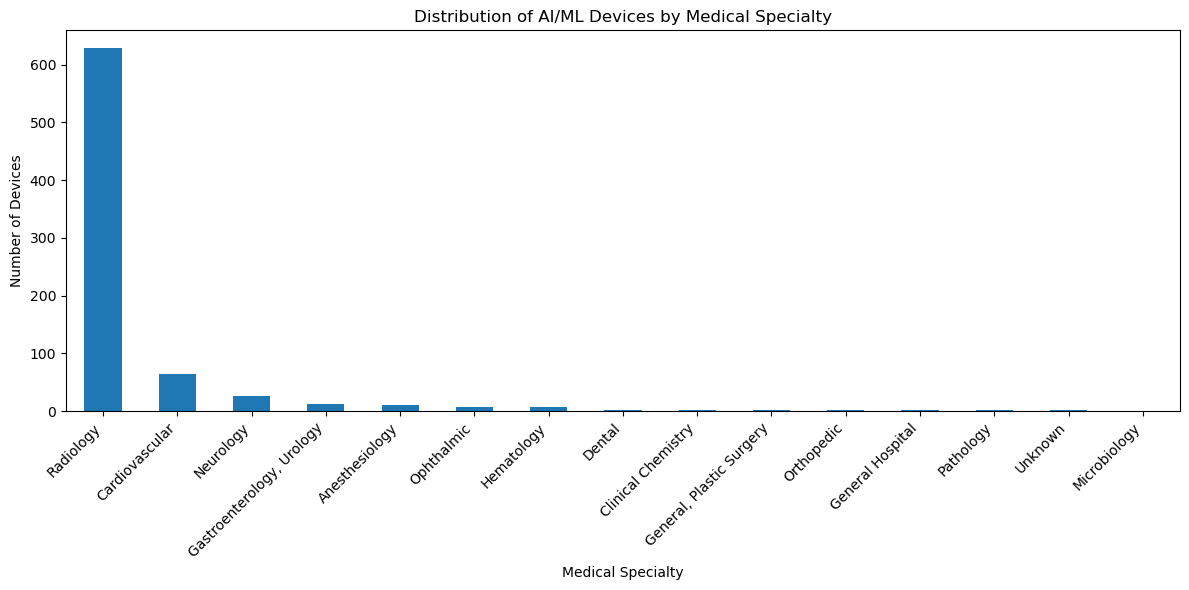

In [43]:
import matplotlib.pyplot as plt
# Create bar plot of medical specialties
plt.figure(figsize=(12,6))
specialty_counts = ai_devices_with_class['medical_specialty_description'].value_counts()
specialty_counts.plot(kind='bar')
plt.title('Distribution of AI/ML Devices by Medical Specialty')
plt.xlabel('Medical Specialty')
plt.ylabel('Number of Devices')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


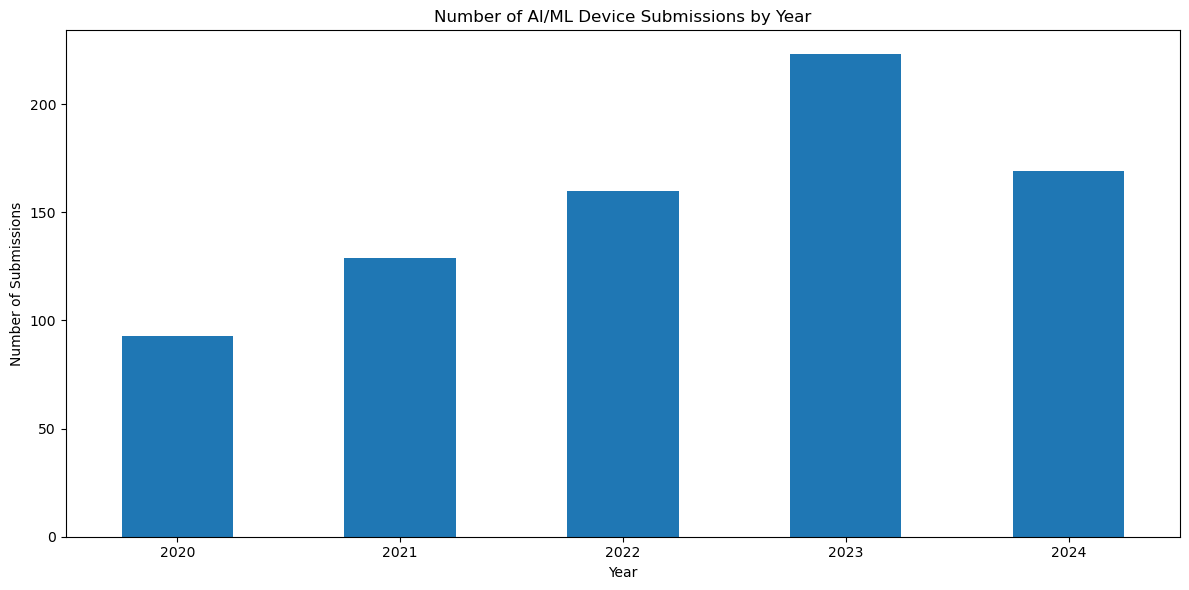

In [44]:
# Convert 'Date of Final Decision' to datetime
ai_devices_with_class['Date of Final Decision'] = pd.to_datetime(ai_devices_with_class['Date of Final Decision'])

# Extract year and count submissions per year
yearly_counts = ai_devices_with_class['Date of Final Decision'].dt.year.value_counts().sort_index()

# Create bar plot of submissions by year
plt.figure(figsize=(12,6))
yearly_counts.plot(kind='bar')
plt.title('Number of AI/ML Device Submissions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Submissions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#We can see that the number of submissions has increased over time, but notably there was a peak in 2023

In [45]:
ai_devices_with_class['device_name'].value_counts()


device_name
Automated Radiological Image Processing Software               143
System, Image Processing, Radiological                          75
System, Imaging, Pulsed Doppler, Ultrasonic                     63
System, X-Ray, Tomography, Computed                             60
System, Nuclear Magnetic Resonance Imaging                      59
                                                              ... 
Ultrasound Guided Nerve Block Assist                             1
Device, Sensing, Optical Contour                                 1
System, X-Ray, Fluoroscopic, Image-Intensified                   1
Adjunctive Epicardial Vascular Physiologic Status Indicator      1
Detector And Alarm, Arrhythmia                                   1
Name: count, Length: 101, dtype: int64

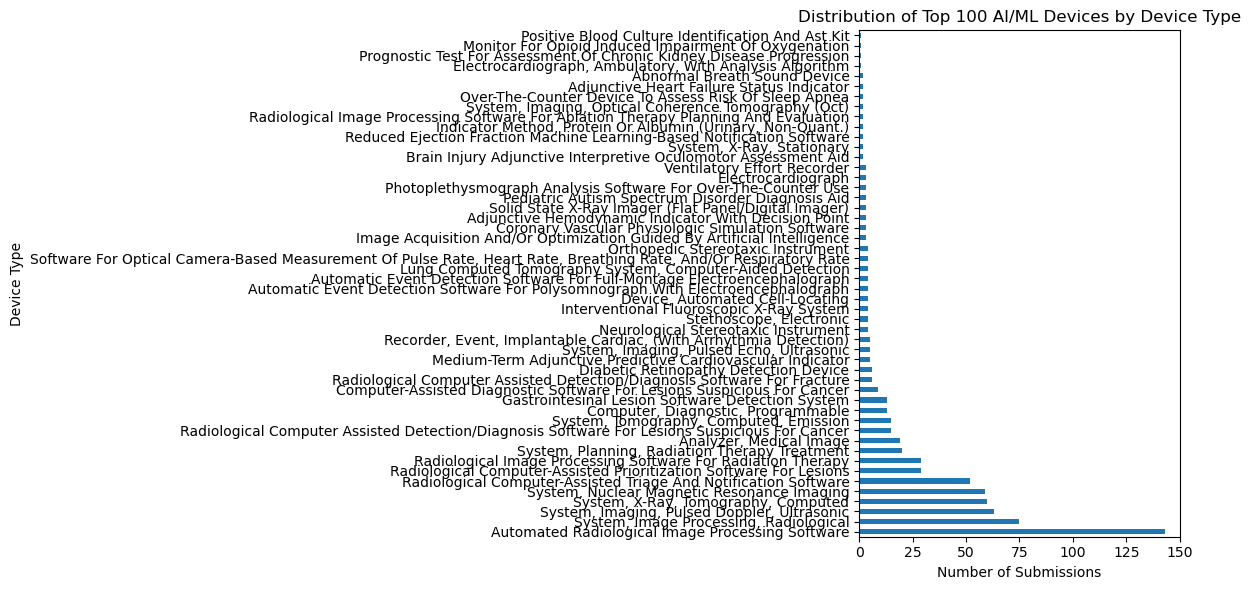

In [46]:
# Create horizontal bar plot of top 100 device types
plt.figure(figsize=(12,6))
device_counts = ai_devices_with_class['device_name'].value_counts().head(50)
device_counts.plot(kind='barh')
plt.title('Distribution of Top 100 AI/ML Devices by Device Type')
plt.xlabel('Number of Submissions')
plt.ylabel('Device Type')
plt.tight_layout()
plt.show()




In [47]:
import pandas as pd

# Filter for the last 5 years
current_year = pd.Timestamp.now().year
last_5_years = ai_devices_with_class[
    ai_devices_with_class['Date of Final Decision'].dt.year >= current_year - 4
]

# Get device counts and calculate percentages
device_counts = last_5_years['device_name'].value_counts()
device_percentages = (device_counts / device_counts.sum()) * 100  # Corrected

# Calculate cumulative percentages
cumulative_percentages = device_percentages.cumsum()

# Find devices accounting for 80% of submissions
devices_80_percent = cumulative_percentages[cumulative_percentages <= 80]

# Display results
if not devices_80_percent.empty:
    print(f"The following {len(devices_80_percent)} device types account for {devices_80_percent.iloc[-1]:.1f}% of submissions in the past 5 years:")
    for device, percentage in device_percentages[devices_80_percent.index].items():
        print(f"- {device}: {percentage:.1f}%")
else:
    print("No device types found that make up 80% of submissions.")

The following 16 device types account for 79.4% of submissions in the past 5 years:
- Automated Radiological Image Processing Software: 19.4%
- System, Image Processing, Radiological: 8.4%
- System, Imaging, Pulsed Doppler, Ultrasonic: 8.4%
- System, Nuclear Magnetic Resonance Imaging: 7.6%
- System, X-Ray, Tomography, Computed: 7.5%
- Radiological Computer-Assisted Triage And Notification Software: 5.9%
- Radiological Computer-Assisted Prioritization Software For Lesions: 3.8%
- Radiological Image Processing Software For Radiation Therapy: 3.8%
- Analyzer, Medical Image: 2.8%
- System, Planning, Radiation Therapy Treatment: 2.6%
- System, Tomography, Computed, Emission: 2.1%
- Radiological Computer Assisted Detection/Diagnosis Software For Lesions Suspicious For Cancer: 1.9%
- Gastrointesinal Lesion Software Detection System: 1.9%
- Computer, Diagnostic, Programmable: 1.6%
- Computer-Assisted Diagnostic Software For Lesions Suspicious For Cancer: 1.0%
- Medium-Term Adjunctive Predicti

In [48]:
ai_devices_with_class['device_class'].value_counts()
# 99.9% of submissions are Class II for AI/ML devices

device_class
2    770
1      2
U      1
3      1
Name: count, dtype: int64

In [49]:
ai_devices_with_class['device_name'].value_counts()

device_name
Automated Radiological Image Processing Software               143
System, Image Processing, Radiological                          75
System, Imaging, Pulsed Doppler, Ultrasonic                     63
System, X-Ray, Tomography, Computed                             60
System, Nuclear Magnetic Resonance Imaging                      59
                                                              ... 
Ultrasound Guided Nerve Block Assist                             1
Device, Sensing, Optical Contour                                 1
System, X-Ray, Fluoroscopic, Image-Intensified                   1
Adjunctive Epicardial Vascular Physiologic Status Indicator      1
Detector And Alarm, Arrhythmia                                   1
Name: count, Length: 101, dtype: int64

In [50]:
# Get counts of device types by year
yearly_device_counts = pd.crosstab(
    ai_devices_with_class['Date of Final Decision'].dt.year,
    ai_devices_with_class['device_name']
)

# Calculate percentages for each year
yearly_device_percentages = yearly_device_counts.div(yearly_device_counts.sum(axis=1), axis=0) * 100

print("\nDevice counts by year:")
print(yearly_device_counts)
print("\nDevice percentages by year:")
print(yearly_device_percentages)



Device counts by year:
device_name             Abnormal Breath Sound Device  \
Date of Final Decision                                 
2020                                               0   
2021                                               0   
2022                                               0   
2023                                               1   
2024                                               1   

device_name             Accelerator, Linear, Medical  \
Date of Final Decision                                 
2020                                               0   
2021                                               0   
2022                                               0   
2023                                               0   
2024                                               1   

device_name             Adjunctive Epicardial Vascular Physiologic Status Indicator  \
Date of Final Decision                                                                
2020            

/var/folders/q2/kz3dc_zd6mqf320p_2cnd0k80000gn/T/ipykernel_90471/3554141298.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

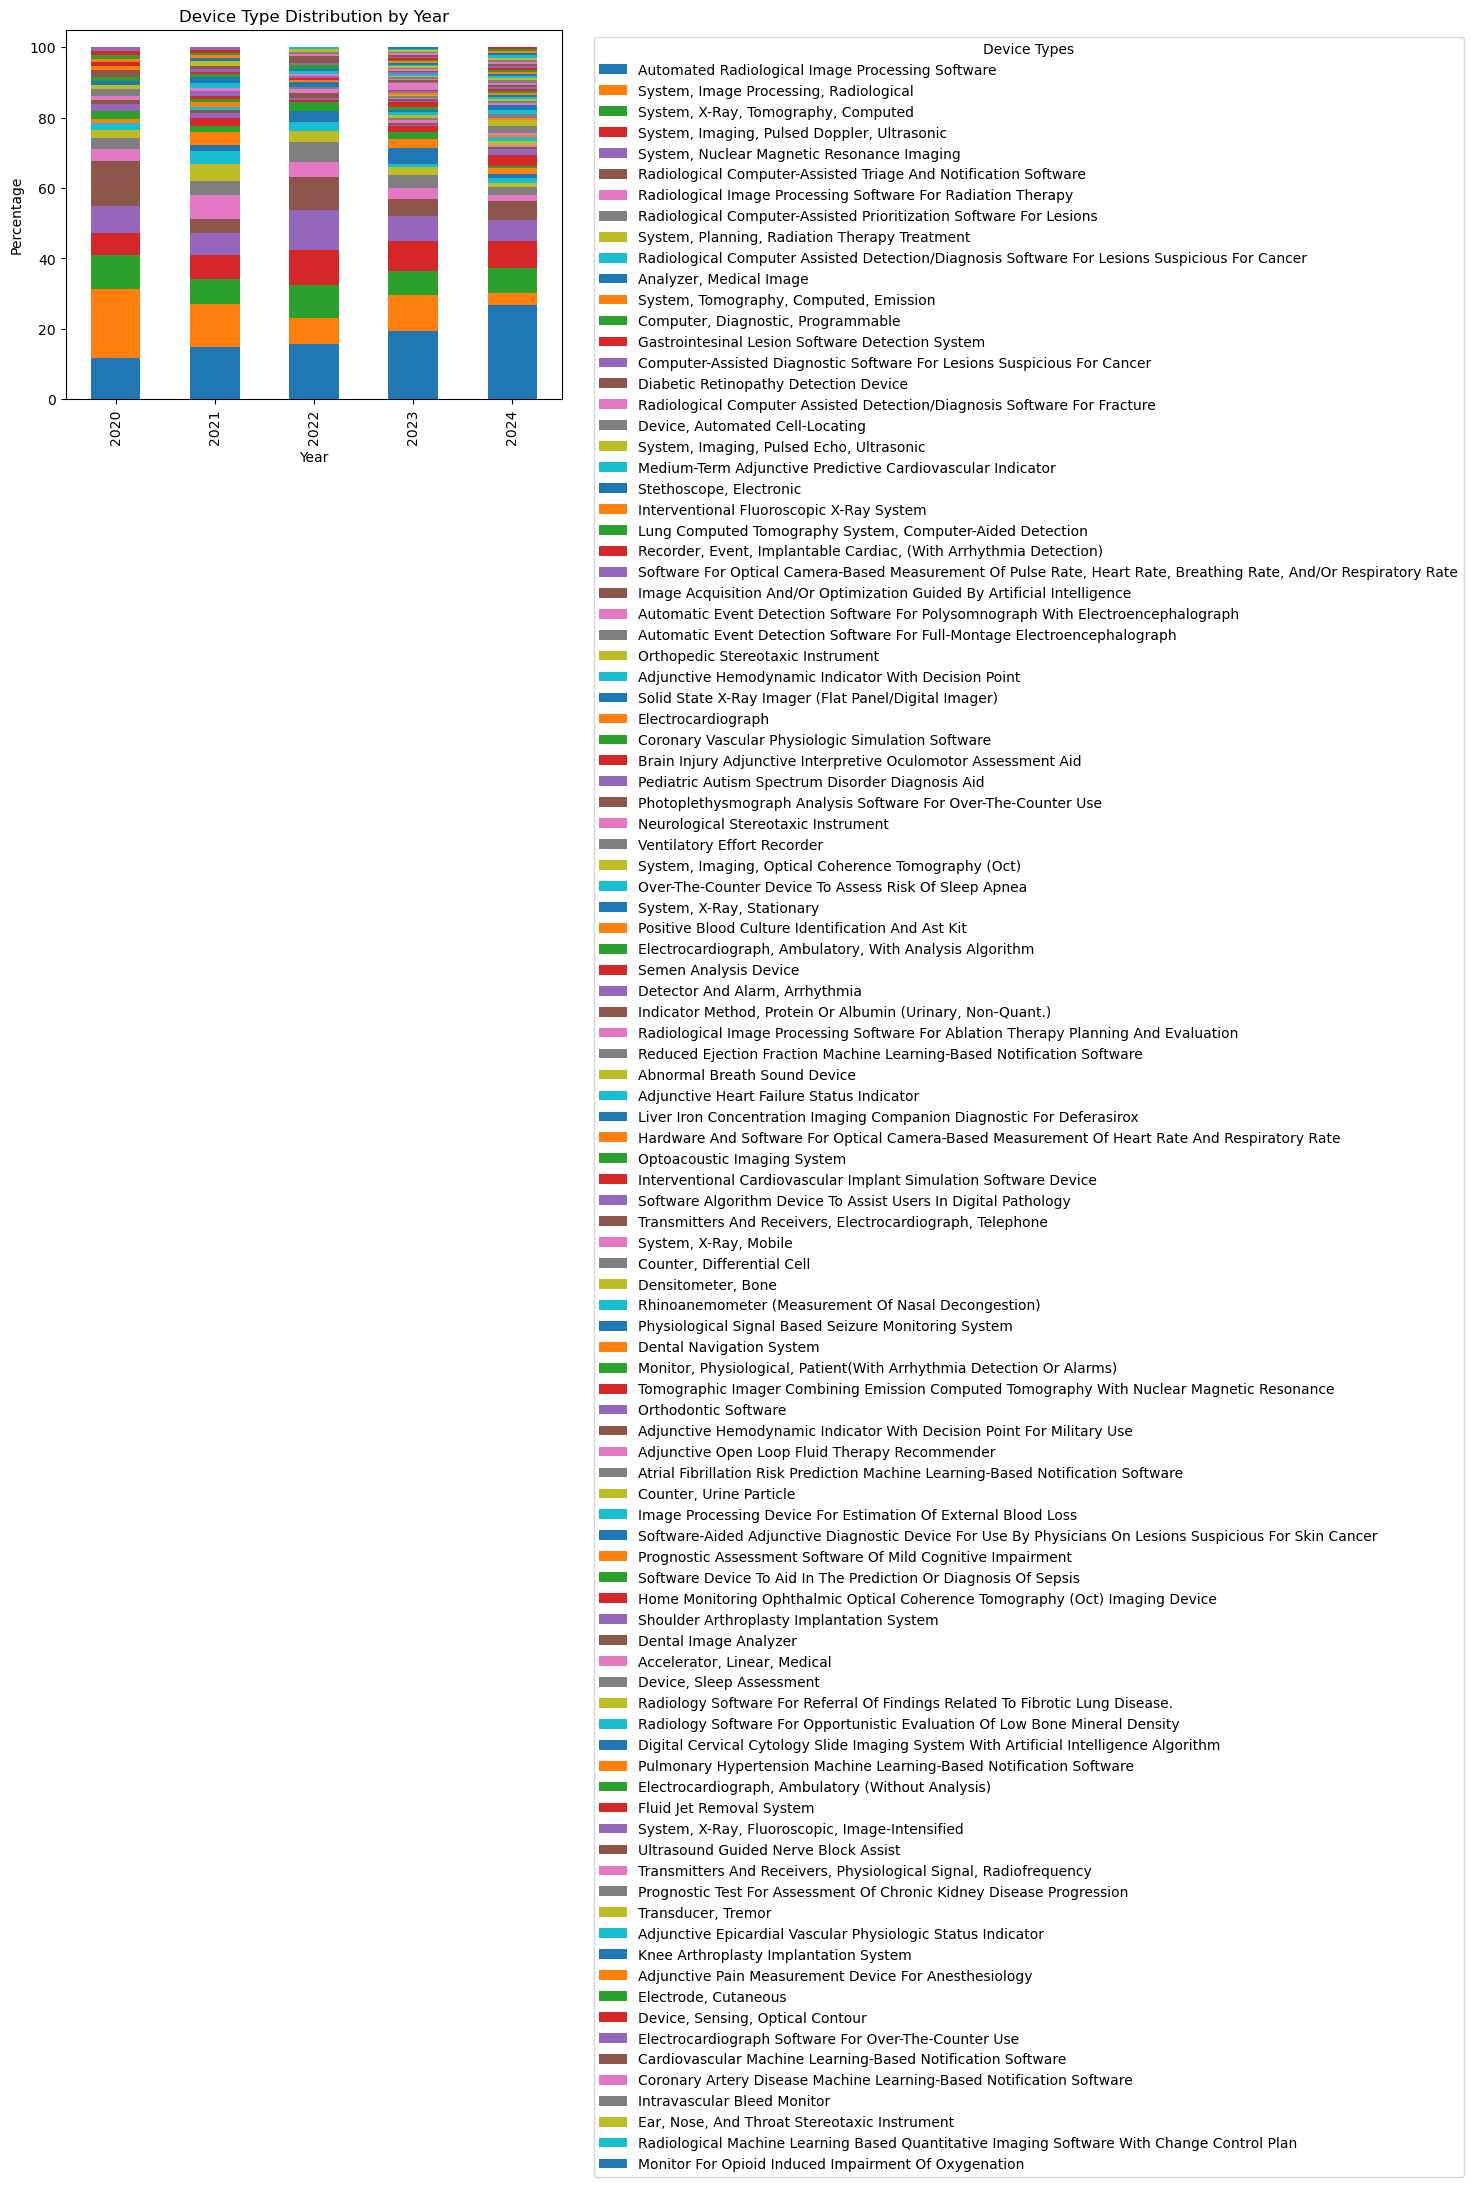

In [51]:
# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Sort columns by their mean values in descending order
sorted_columns = yearly_device_percentages.mean().sort_values(ascending=False).index
yearly_device_percentages_sorted = yearly_device_percentages[sorted_columns]

yearly_device_percentages_sorted.plot(kind='bar', stacked=True)

plt.title('Device Type Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Device Types')
plt.tight_layout()
plt.show()



Medical specialty counts by year:
medical_specialty_description  Anesthesiology  Cardiovascular  \
Date of Final Decision                                          
2020                                        0               6   
2021                                        0              12   
2022                                        1              13   
2023                                        5              21   
2024                                        5              12   

medical_specialty_description  Clinical Chemistry  Dental  \
Date of Final Decision                                      
2020                                            0       0   
2021                                            0       0   
2022                                            1       0   
2023                                            2       0   
2024                                            0       3   

medical_specialty_description  Gastroenterology, Urology  General Hospital  \
Dat

<Figure size 1200x600 with 0 Axes>

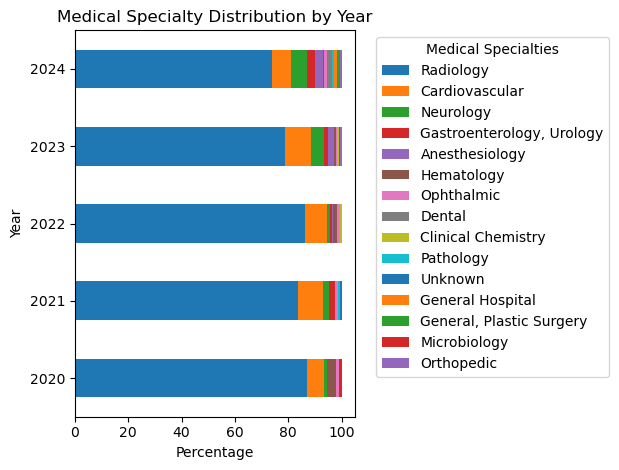

In [52]:
# Get counts of medical specialties by year
yearly_specialty_counts = pd.crosstab(
    ai_devices_with_class['Date of Final Decision'].dt.year,
    ai_devices_with_class['medical_specialty_description']
)

# Calculate percentages for each year
yearly_specialty_percentages = yearly_specialty_counts.div(yearly_specialty_counts.sum(axis=1), axis=0) * 100

print("\nMedical specialty counts by year:")
print(yearly_specialty_counts)
print("\nMedical specialty percentages by year:")
print(yearly_specialty_percentages)

# Sort columns by their mean values in descending order
sorted_columns = yearly_specialty_percentages.mean().sort_values(ascending=False).index
yearly_specialty_percentages_sorted = yearly_specialty_percentages[sorted_columns]

# Create a horizontal stacked bar chart
plt.figure(figsize=(12, 6))
yearly_specialty_percentages_sorted.plot(kind='barh', stacked=True)

plt.title('Medical Specialty Distribution by Year')
plt.ylabel('Year')
plt.xlabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Medical Specialties')
plt.tight_layout()
plt.show()


In [53]:
import numpy as np
# Calculate the percentage change in device types over the past 5 years
device_counts_by_year = pd.crosstab(
    ai_devices_with_class['Date of Final Decision'].dt.year,
    ai_devices_with_class['device_name']
)

# Get the last 5 years of data
last_5_years = device_counts_by_year.index.sort_values()[-5:]
device_counts_last_5y = device_counts_by_year.loc[last_5_years]

# Calculate percentage change between first and last year
first_year = device_counts_last_5y.iloc[0]
last_year = device_counts_last_5y.iloc[-1]

pct_changes = ((last_year - first_year) / first_year * 100).sort_values(ascending=False)

# Filter out devices that didn't exist in first year (would give infinite % change)
pct_changes = pct_changes[~np.isinf(pct_changes)]

print("\nTop 10 devices with largest percentage change in past 5 years:")
print("\nDevice Type | 2020 Count | 2024 Count | % Change")
print("-" * 70)
for device, pct_change in pct_changes.head(10).items():
    print(f"{device[:40]:<40} | {first_year[device]:>10d} | {last_year[device]:>10d} | {pct_change:>6.1f}%")



Top 10 devices with largest percentage change in past 5 years:

Device Type | 2020 Count | 2024 Count | % Change
----------------------------------------------------------------------
Automated Radiological Image Processing  |         11 |         45 |  309.1%
System, Tomography, Computed, Emission   |          1 |          3 |  200.0%
System, Imaging, Pulsed Doppler, Ultraso |          6 |         13 |  116.7%
System, Imaging, Pulsed Echo, Ultrasonic |          1 |          2 |  100.0%
Computer-Assisted Diagnostic Software Fo |          2 |          3 |   50.0%
System, Nuclear Magnetic Resonance Imagi |          7 |         10 |   42.9%
Radiological Computer-Assisted Prioritiz |          3 |          4 |   33.3%
System, X-Ray, Tomography, Computed      |          9 |         12 |   33.3%
Radiological Image Processing Software F |          3 |          3 |    0.0%
Diabetic Retinopathy Detection Device    |          1 |          1 |    0.0%


In [54]:
import numpy as np
# Calculate the percentage change in medical specialties over the past 5 years
specialty_counts_by_year = pd.crosstab(
    ai_devices_with_class['Date of Final Decision'].dt.year,
    ai_devices_with_class['medical_specialty_description']
)

# Get the last 5 years of data
last_5_years = specialty_counts_by_year.index.sort_values()[-5:]
specialty_counts_last_5y = specialty_counts_by_year.loc[last_5_years]

# Calculate percentage change between first and last year
first_year = specialty_counts_last_5y.iloc[0]
last_year = specialty_counts_last_5y.iloc[-1]

pct_changes = ((last_year - first_year) / first_year * 100).sort_values(ascending=False)

# Filter out specialties that didn't exist in first year (would give infinite % change)
pct_changes = pct_changes[~np.isinf(pct_changes)]

print("\nTop 10 medical specialties with largest percentage change in past 5 years:")
print("\nMedical Specialty | 2020 Count | 2024 Count | % Change")
print("-" * 70)
for specialty, pct_change in pct_changes.head(10).items():
    print(f"{specialty[:40]:<40} | {first_year[specialty]:>10d} | {last_year[specialty]:>10d} | {pct_change:>6.1f}%")



Top 10 medical specialties with largest percentage change in past 5 years:

Medical Specialty | 2020 Count | 2024 Count | % Change
----------------------------------------------------------------------
Neurology                                |          1 |         10 |  900.0%
Cardiovascular                           |          6 |         12 |  100.0%
Ophthalmic                               |          1 |          2 |  100.0%
Radiology                                |         81 |        125 |   54.3%
Hematology                               |          3 |          1 |  -66.7%
Microbiology                             |          1 |          0 | -100.0%
Clinical Chemistry                       |          0 |          0 |    nan%
Unknown                                  |          0 |          0 |    nan%
